In [3]:
import numpy as np
import pandas as pd
import pysindy as ps
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
from sysidentpy.utils.display_results import results
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial

# To have the Matplotlib plots centered in the notebook
from IPython.core.display import HTML
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
    </style>
    """)

$$\Large\text{Logistic Map}$$
$$\large x_{n+1} = \lambda x_n (1 - x_n) + \eta_n$$
$$\large \eta_n \sim N(0,10^{-3}) \qquad n \in {0, 1, \dots} \qquad 0 \leq x_0 \leq 1 \qquad 0 < \lambda < 4$$

In [147]:
mus = [2.5, 2.75, 3, 3.25, 3.5, 3.75, 3.8, 3.85, 3.9, 3.95]
N = 1000

mu = np.zeros(N)
x = np.zeros(N)
x[0] = npr.rand()

for n in range(1, N):
    mu[n-1] = npr.choice(mus)
    x[n] = np.clip(mu[n-1] * x[n-1] * (1 - x[n-1]) + 0.01 * npr.rand(), 0, 1)
x = np.vstack((x, mu)).T

# Split Gnerated Data into Train-Test
x_train, x_test, n_train, n_test = train_test_split(x, list(range(N)), test_size=0.6, shuffle=False)

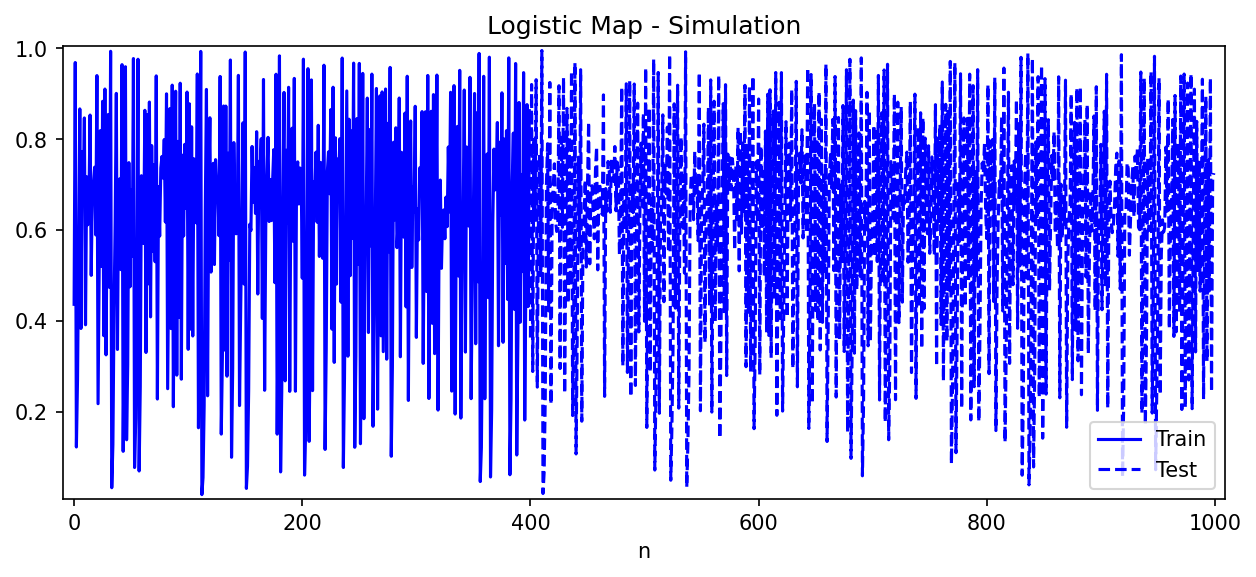

In [149]:
plt.figure(figsize=(10, 4), dpi=150)
plt.title('Logistic Map - Simulation')
plt.margins(0.01, tight=True)
plt.plot(n_train, x_train[:,0], 'b', label='Train')
plt.plot(n_test, x_test[:,0], 'b--', label='Test')
plt.xlabel('n')
plt.legend()
print(end='')

In [150]:
# Define SINDy Model
sindy_model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.1),
    feature_library=ps.PolynomialLibrary(degree=5),
    discrete_time=True
)

# Fit and print resulting model
sindy_model.fit(x, quiet=True)
sindy_model.print()

x0[k+1] = 1.005 x0[k] x1[k] + -1.004 x0[k]^2 x1[k]
x1[k+1] = 2.852 1 + 0.115 x0[k] + 0.172 x1[k] + 0.990 x0[k]^2 + -0.465 x0[k]^2 x1[k] + 0.436 x0[k]^4 + -0.751 x0[k]^5 + 0.228 x0[k]^4 x1[k]


In [167]:
# FROLS: Forward Regression Orthogonal Least Squares algorithm
narmax_model = FROLS(
    n_terms=3,
    ylag=1, xlag=1,
    estimator='least_squares',
    basis_function=Polynomial(degree=5)
)
narmax_model.fit(X=x_train[1:, 1].reshape(-1, 1), y=x_train[:-1,0].reshape(-1, 1))
r = pd.DataFrame(results(
    narmax_model.final_model, narmax_model.theta, narmax_model.err,
    narmax_model.n_terms, err_precision=8, dtype='sci'), columns=['Regressors', 'Parameters', 'ERR'])
print('Regressors Y')
print(r)


Regressors Y
  Regressors   Parameters             ERR
0          1   3.7334E-01  8.42629550E-01
1   y(k-1)^5  -1.4646E+00  8.17691975E-02
2     y(k-1)   9.2202E-01  4.03459890E-02
